# Problem statement

https://www.kaggle.com/startupsci/titanic-data-science-solutions

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


# List of steps

Read file

Describe numerical + categorical variables

Check for missing values + decide whether to drop or fill

Delete unneccessary columns

Perform heat map analysis

Categorize data

Univariate analysis - histograms/violinplot

Multivariate analysis - faceted histogram/scatterplot

Convert binaries to 0/1, convert continuous data to bin groups

Ensure no missing values

Run sklearn

# Initial Intuition

High correlation for sex/age with Survival
- Women and children were more likely to survive due to 'women and children first' policy

Pclass is negatively correlated with Survival. 
- First class had cabins higher up, and were more likely to survive.

Fare is positively correlated with Pclass

# Imports

In [193]:
# data analysis and wrangling
import pandas as pd
import pandas_profiling
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(
    context='notebook',  # {paper, notebook, talk, poster}
    style='darkgrid',  # {darkgrid, whitegrid, ticks}
    palette='deep',  # {deep, muted, bright, pastel, dark, colorblind}
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)

%matplotlib inline

In [194]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Read file

In [195]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Basic analysis

In [196]:
profile = train_df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="fifa_pandas_profiling.html")
# Open the file in Jupyter Home

## Analysis from pandas profiling
**Columns to drop:**

Columns with high cardinality

- Ticket, Cabin

Columns with 60% or above missing values

- Cabin

Index columns

- PassengerID, Names

**Columns to clean**
- Age

**Variable types**

- Discrete - Parch, SibSp

- Continuous - Age, Fare

- Ordinal - Pclass

- Nominal - Embarked, Name

- Binary - Sex, Survived


In [197]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [199]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",male,1601,B96 B98,S
freq,1,577,7,4,644


# Columns to drop

In [200]:
train_df.drop(['PassengerId','Cabin', 'Ticket', 'Name'], inplace=True, axis=1)

In [201]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Binary columns to convert

In [202]:
to_binary = {'male':1,'female':0}
train_df['Sex'] = train_df['Sex'].map(to_binary)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


# Check correlation heatmap

Necessary before any data cleaning can be done. E.g. Median between categorical variables may vary significantly.

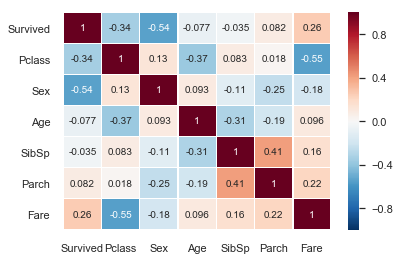

In [203]:
corr = train_df.corr()
sns.set_style('darkgrid')
sns.heatmap(corr,
            annot=True,
            linewidths=.5,
            xticklabels=True,
            yticklabels=True,
            cmap="RdBu_r",
            vmin=-1,
            vmax=1)

# Check for strong correlations with Age to clean the column - Pclass seem to be significantly correlated

# Columns to clean

In [204]:
# Columns to clean
for col in train_df:
    if train_df[col].isna().any() == True:
        print(col, train_df[col].isna().any())

Age True
Embarked True


## Embarked column

Fill with mode 

In [205]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Embarked'].isna().any() # Check successfully cleaned

False

## Age column

### Examine correlation between Age and Pclass (Bivariate)

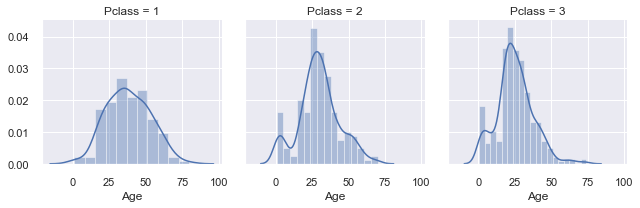

In [207]:
grid = sns.FacetGrid(data=train_df, col="Pclass", margin_titles=True)
grid.map(sns.distplot, "Age")
# We can confirm that indeed, the distribution hence median value varies with Pclass

### Examine correlation between Age and SibSp (Bivariate)

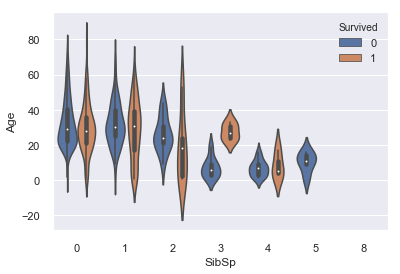

In [208]:
g = sns.violinplot("SibSp", "Age", hue='Survived', data=train_df)

### Get median values for age for different Pclass

In [209]:
median_age = train_df['Age'].groupby(train_df['Pclass']).median()
median_age

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

### Fill na values with respective medians

In [210]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [211]:
train_df.set_index('Pclass', inplace=True)
# Need the indexes of the series and dataframe to be the same i.e. Pclass

In [212]:
train_df["Age"].fillna(median_age, inplace=True)

In [213]:
train_df.reset_index(drop=False, inplace=True)
# Reset the index

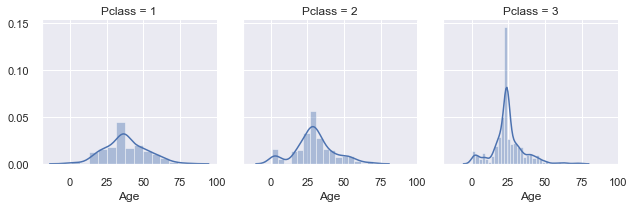

In [214]:
grid = sns.FacetGrid(train_df, col="Pclass", margin_titles=True)
grid.map(sns.distplot, "Age")
# Can see how much the distribution was changed compared to earlier

# Exploring the correlation map in further detail
- Pclass
- Sex
- Age
- SibSp
- Parch
- Fare
- Embarked

### Bivariate analysis - base rate = 0.3
- Females had higher survival rate compared to base rate
- Pclass is inversely related to survival
- Individuals with 1-3 Parch had higher survival rate compared to base rate (3,1,2)
- Individuals with 1-2 SibSp had higher survival rate compared to base rate
- Individuals less Age<6 had higher survival rate compared to base rate
- Individuals who embarked at C had higher survival rate compared to base rate

In [215]:
survived_correlation = ['Sex','Pclass','Parch','SibSp']
# Get all categorical variables

In [216]:
for factor in survived_correlation:
    factor_df = train_df[[factor, 'Survived']].groupby(train_df[factor]).mean().sort_values(
        by='Survived', ascending=False).reset_index(drop=True)
    print(factor_df)

   Sex  Survived
0  0.0  0.742038
1  1.0  0.188908
   Pclass  Survived
0     1.0  0.629630
1     2.0  0.472826
2     3.0  0.242363
   Parch  Survived
0    3.0  0.600000
1    1.0  0.550847
2    2.0  0.500000
3    0.0  0.343658
4    5.0  0.200000
5    4.0  0.000000
6    6.0  0.000000
   SibSp  Survived
0    1.0  0.535885
1    2.0  0.464286
2    0.0  0.345395
3    3.0  0.250000
4    4.0  0.166667
5    5.0  0.000000
6    8.0  0.000000


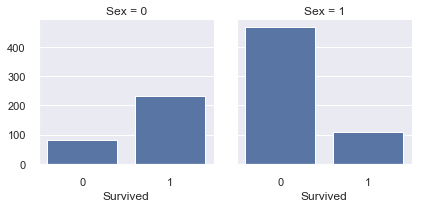

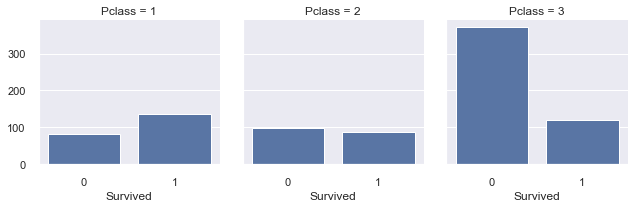

In [217]:
for factor in ['Sex','Pclass']:
    grid = sns.FacetGrid(train_df, col=factor, margin_titles=True)
    grid.map(sns.countplot, "Survived")

In [218]:
factor_df = age_selected[['Age', 'Survived'
                      ]].groupby(age_selected['Age']).mean().sort_values(
                          by='Survived',
                          ascending=False).reset_index(drop=True)
print(factor_df)

     Age  Survived
0   0.42  1.000000
1   0.67  1.000000
2   0.75  1.000000
3   0.83  1.000000
4   0.92  1.000000
5   5.00  1.000000
6   3.00  0.833333
7   1.00  0.714286
8   4.00  0.700000
9   6.00  0.666667
10  8.00  0.500000
11  7.00  0.333333
12  2.00  0.300000
13  9.00  0.250000


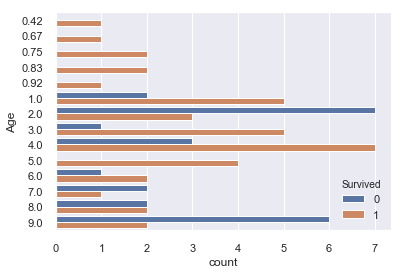

In [219]:
age_selected = train_df[train_df['Age'] < 10]
ax = sns.countplot(y="Age", hue="Survived", data=age_selected)
# From the countplot, we observe that age<9 is statistically 
# more likely to survive compared to the base rate survival

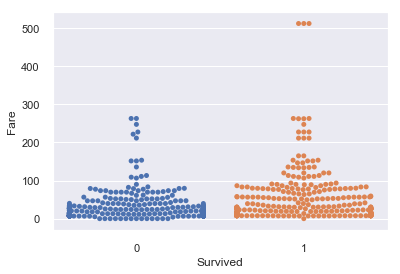

In [220]:
g = sns.swarmplot("Survived", "Fare", data=train_df)

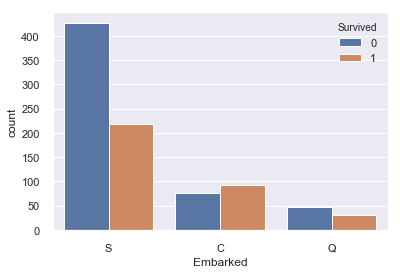

In [221]:
ax = sns.countplot(x="Embarked",
                   hue="Survived",
                   data=train_df)

### Multivariate analysis
- Females were more likely to survive than die across all Pclass
- Men were more likely to die than survive across all Pclass
- The number of women who survived decreases from Pclass=1 to 3
- The rate of survival for men is ranked as follows in Pclass: 1, 3, 2 (i.e. not linearly correlated)
- The most number of deaths came from Pclass=3 and Sex=1

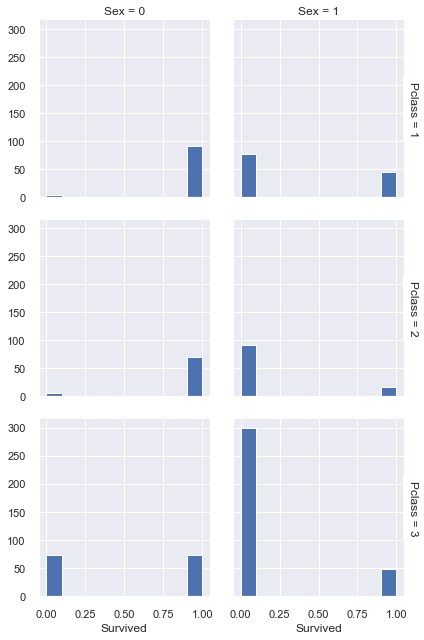

In [222]:
grid = sns.FacetGrid(train_df, col="Sex", row='Pclass', margin_titles=True)
# FacetGrid - best for categorical variables
grid.map(plt.hist, "Survived")

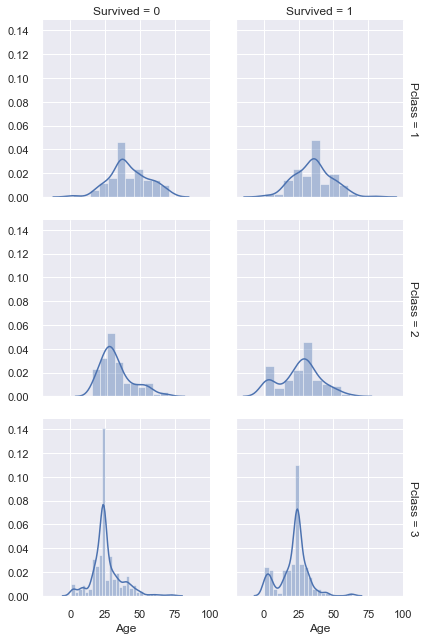

In [223]:
grid = sns.FacetGrid(train_df,
                     col="Survived",
                     row='Pclass',
                     margin_titles=True)
grid.map(sns.distplot, "Age")
# There are humps in the distribution, suggesting those below a certain age have a higher chance of surviving

# Creating new columns based on analysis
- Females had higher survival rate compared to base rate 
- Pclass is inversely related to survival 
- Individuals less Age<7 had higher survival rate compared to base rate
- Individuals with 1-3 Parch had higher survival rate compared to base rate (3,1,2)
- Individuals with 1-2 SibSp had higher survival rate compared to base rate

## Creating column for Age<7

In [224]:
train_df['Below_7'] = 0
train_df['Below_7'].loc[train_df['Age'] < 7] = 1

## Converting Ages to Age Bands

In [225]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived'
          ]].groupby(['AgeBand'],
                     as_index=False).mean().sort_values(by='AgeBand',
                                                        ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [226]:
train_df['Age'].loc[train_df['Age']<=16] = 0
train_df['Age'].loc[(train_df['Age']>16) & (train_df['Age'] <= 32) ] = 1
train_df['Age'].loc[(train_df['Age']>32) & (train_df['Age'] <= 48) ] = 2
train_df['Age'].loc[(train_df['Age']>48) & (train_df['Age'] <= 64) ] = 3
train_df['Age'].loc[(train_df['Age']>16)] = 4

In [227]:
train_df.drop(['AgeBand'], inplace=True, axis=1)

In [228]:
train_df.head()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Below_7
0,3,0,1,1.0,1,0,7.2500,S,0
1,1,1,0,2.0,1,0,71.2833,C,0
2,3,1,0,1.0,0,0,7.9250,S,0
3,1,1,0,2.0,1,0,53.1000,S,0
4,3,0,1,2.0,0,0,8.0500,S,0


## Creating column for 0<Parch<4

In [229]:
train_df['1_3_Parch'] = 0
train_df['1_3_Parch'].loc[ (train_df['Parch'] > 0) & (train_df['Parch'] < 4)] = 1

## Creating column for 0<SibSp<3

In [230]:
train_df['1_2_SibSp'] = 0
train_df['1_2_SibSp'].loc[ (train_df['SibSp'] > 0) & (train_df['SibSp'] < 3)] = 1

In [231]:
train_df.head()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Below_7,1_3_Parch,1_2_SibSp
0,3,0,1,1.0,1,0,7.2500,S,0,0,1
1,1,1,0,2.0,1,0,71.2833,C,0,0,1
2,3,1,0,1.0,0,0,7.9250,S,0,0,0
3,1,1,0,2.0,1,0,53.1000,S,0,0,1
4,3,0,1,2.0,0,0,8.0500,S,0,0,0


In [232]:
train_df.drop(['SibSp','Parch'], inplace=True, axis=1)

In [233]:
train_df.head()

,Pclass,Survived,Sex,Age,Fare,Embarked,Below_7,1_3_Parch,1_2_SibSp
0,3,0,1,1.0,7.2500,S,0,0,1
1,1,1,0,2.0,71.2833,C,0,0,1
2,3,1,0,1.0,7.9250,S,0,0,0
3,1,1,0,2.0,53.1000,S,0,0,1
4,3,0,1,2.0,8.0500,S,0,0,0


# Convert the remaining non-ordinal/binary columns to such

## Convert Fare to Binary

In [234]:
train_df['FareBand']=pd.cut(train_df['Fare'], 10)
train_df[['FareBand', 'Survived'
          ]].groupby(['FareBand'],
                     as_index=False).mean().sort_values(by='FareBand',
                                                        ascending=True)

,FareBand,Survived
0,"(-0.512, 51.233]",0.318306
1,"(51.233, 102.466]",0.660377
2,"(102.466, 153.699]",0.741935
3,"(153.699, 204.932]",1.000000
4,"(204.932, 256.165]",0.636364
5,"(256.165, 307.398]",0.666667
6,"(307.398, 358.63]",NaN
7,"(358.63, 409.863]",NaN
8,"(409.863, 461.096]",NaN
9,"(461.096, 512.329]",1.000000


In [235]:
train_df['Fare_2'] = 0
train_df['Fare_2'].loc[(train_df['Fare'] > 50)] = 1

In [236]:
train_df.drop(['FareBand','Fare'], inplace=True, axis=1)

In [237]:
train_df.head()

,Pclass,Survived,Sex,Age,Embarked,Below_7,1_3_Parch,1_2_SibSp,Fare_2
0,3,0,1,1.0,S,0,0,1,0
1,1,1,0,2.0,C,0,0,1,1
2,3,1,0,1.0,S,0,0,0,0
3,1,1,0,2.0,S,0,0,1,1
4,3,0,1,2.0,S,0,0,0,0


## Convert Embarked to Ordinal

In [241]:
to_binary = {'C':0,'Q':1, 'S':2}
train_df['Embarked'] = train_df['Embarked'].map(to_binary)

,Pclass,Survived,Sex,Age,Embarked,Below_7,1_3_Parch,1_2_SibSp,Fare_2
0,3,0,1,1.0,2,0,0,1,0
1,1,1,0,2.0,0,0,0,1,1
2,3,1,0,1.0,2,0,0,0,0
3,1,1,0,2.0,2,0,0,1,1
4,3,0,1,2.0,2,0,0,0,0


In [242]:
train_df.head()

,Pclass,Survived,Sex,Age,Embarked,Below_7,1_3_Parch,1_2_SibSp,Fare_2
0,3,0,1,1.0,2,0,0,1,0
1,1,1,0,2.0,0,0,0,1,1
2,3,1,0,1.0,2,0,0,0,0
3,1,1,0,2.0,2,0,0,1,1
4,3,0,1,2.0,2,0,0,0,0


In [259]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = train_df.drop("Survived", axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (891, 8))

In [254]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [262]:
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.69

In [289]:
coeff_df = pd.DataFrame(train_df.columns.delete(1))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

,Feature,Correlation
0,Below_7,1.470912
1,Fare_2,0.424249
2,1_2_SibSp,0.229622
3,Embarked,-0.211877
4,1_3_Parch,-0.215564
5,Age,-0.255721
6,Pclass,-0.864529
7,Sex,-2.410722


In [278]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.59

In [279]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

In [280]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

73.06

In [281]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.79

In [282]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.8

In [283]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

38.38

In [284]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.2

In [285]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.2

In [288]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False).reset_index(drop=True)

,Model,Score
0,Random Forest,86.20
1,Decision Tree,86.20
2,KNN,83.84
3,Support Vector Machines,81.59
4,Linear SVC,79.80
5,Logistic Regression,79.69
6,Perceptron,78.79
7,Naive Bayes,73.06
8,Stochastic Gradient Decent,38.38
